<a href="https://colab.research.google.com/github/alexc6h6/Auto-Encoder/blob/master/Denoising_Autoencoder(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/digit_recognizer'

MNIST_model.h5	sample_submission.csv  test.csv  train.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/digit_recognizer/train.csv')


In [0]:
labels = data.iloc[:, 0].values.reshape(-1, 1)


In [26]:
images = data.iloc[:, 1:].values.reshape(-1, 28 ,28, 1)
images = images.astype('float32')/255
print(images.shape)

(42000, 28, 28, 1)


In [0]:
noice_factor = 0.5

noice_images = images + noice_factor* np.random.normal(loc = 0.0, scale = 1.0, size = images.shape)
noice_images = np.clip(noice_images, 0., 1.)


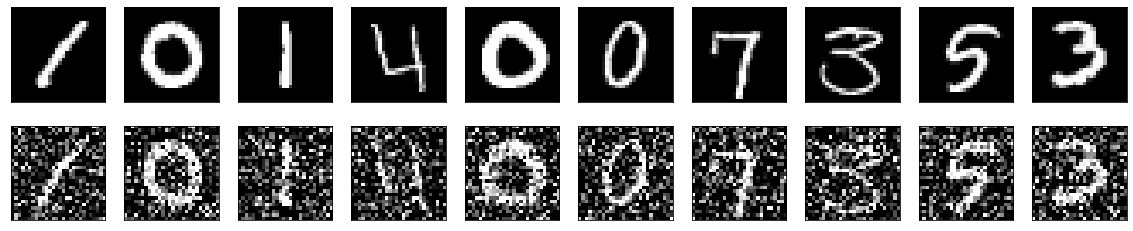

In [28]:
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
  ax = plt.subplot(2, n, 1+ i)
  plt.imshow(images[i][:, :, 0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, 1+i+n)
  plt.imshow(noice_images[i][:, :, 0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)



In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(noice_images, images, test_size = 0.1)


In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [31]:
img_input = Input(shape = (28, 28, 1))
x = Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu')(img_input)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu')(x)
encode = MaxPooling2D((2,2), padding = 'same')(x)

decode_input = Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu')(encode)
x = UpSampling2D((2,2))(decode_input)
x = Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decode_output = Conv2D(1, (3,3), strides = 1, padding = 'same', activation = 'sigmoid')(x)

autoencoder = Model(inputs = img_input, outputs = decode_output)

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 64)        0   

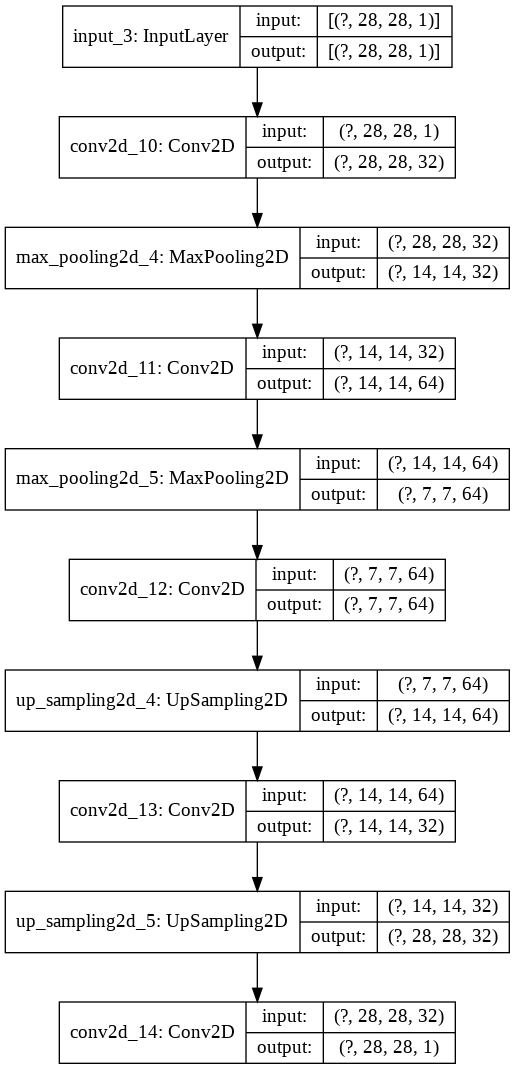

In [32]:
plot_model(autoencoder, show_shapes = True)

In [0]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 5,
                              factor = 0.033,
                              verbose = 1)

In [35]:
epochs = 50
batch = 128

history = autoencoder.fit(x_train, y_train,
                          epochs = epochs,
                          batch_size = batch,
                          verbose = 1,
                          callbacks = [reduce_lr],
                          validation_split = 0.1)

Epoch 1/50
266/266 [==============================] - 2s 7ms/step - loss: 0.1978 - val_loss: 0.1249 - lr: 0.0010
Epoch 2/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1182 - val_loss: 0.1136 - lr: 0.0010
Epoch 3/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1115 - val_loss: 0.1100 - lr: 0.0010
Epoch 4/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1078 - val_loss: 0.1065 - lr: 0.0010
Epoch 5/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1054 - val_loss: 0.1042 - lr: 0.0010
Epoch 6/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1034 - val_loss: 0.1032 - lr: 0.0010
Epoch 7/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1020 - val_loss: 0.1012 - lr: 0.0010
Epoch 8/50
266/266 [==============================] - 2s 6ms/step - loss: 0.1008 - val_loss: 0.1005 - lr: 0.0010
Epoch 9/50
266/266 [==============================] - 2s 6ms/step - loss: 0.0999 - val_loss: 0.0

In [0]:
pred = autoencoder.predict(x_test)

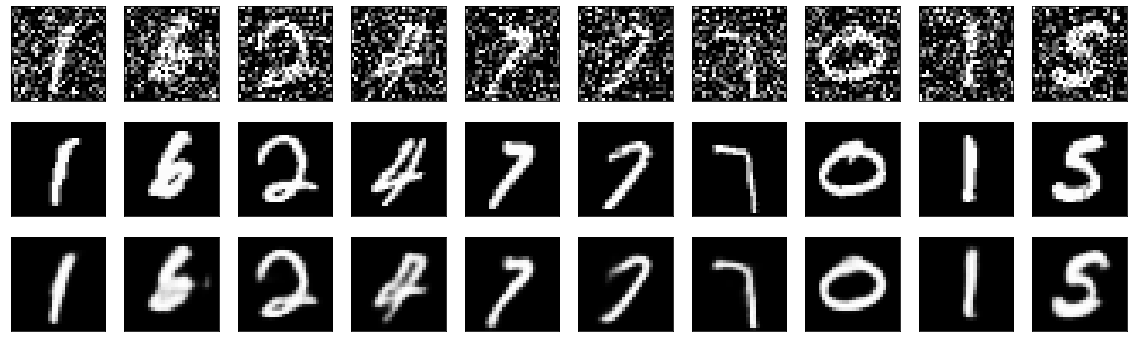

In [38]:
n = 10
plt.figure(figsize = (20, 6))

for i in range(n):
  ax = plt.subplot(3, n, 1+i)
  plt.imshow(x_test[i][:, :, 0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, 1+i+n)
  plt.imshow(y_test[i][:, :, 0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, 1+i+n+n)
  plt.imshow(pred[i][:, :, 0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
